<a href="https://colab.research.google.com/github/Nissun662/Data-Visual/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam 1
##Nishan Sunar
250662  
CPSMA 4313

Before I begin my exam, I am going to load all libraries required to complete the assignment. I will I also need to get authenticated.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
#Libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate

#1. Gather the table on 8000 km mountains from the wikipedia page https://en.wikipedia.org/wiki/List of mountains by elevation  
##(a) (10 points) Store the data as a pandas dataframe  


In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation') #Extracting raw data directly from the wikipage
contents = r.text
html_soup = BeautifulSoup(contents,"lxml")

In [ ]:
html_soup.title

<title>List of mountains by elevation - Wikipedia</title>

In [ ]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


##(b) (10 points) Return only mountains in the ‘Himalayas’

In [ ]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


##(c) (10 points) Create a barchart of the Ranges


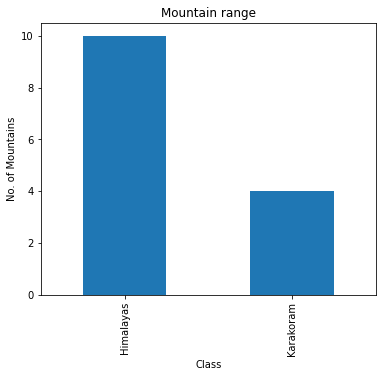

In [ ]:
dfg = df.groupby(['Range'])['Range'].count()

dfg.plot(kind='bar', title='Mountain range', ylabel='No. of Mountains',
         xlabel='Class', figsize=(6, 5))

##(d) (10 points) Create a box-plot of the height in Feet  

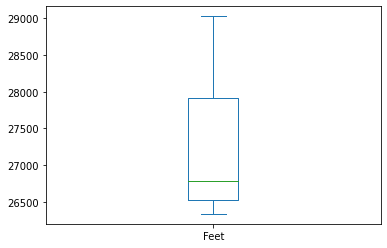

In [ ]:
df.Feet.plot(kind = 'box')

##(e) (10 points) Report the mean, standard deviation and five number summary of the height in Feet 

In [ ]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64


 ## (f) (10 points) Report the mean and median of mountains when grouped by their Range.  

In [ ]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()

print(tabulate(mean, headers=["Range", "Meters_mean", "Feet_mean"], tablefmt="psql"))

print(tabulate(median, headers=["Range", "Meters_median", "Feet_median"], tablefmt="psql"))

+-----------+---------------+-------------+
| Range     |   Meters_mean |   Feet_mean |
|-----------+---------------+-------------|
| Himalayas |       8319.7  |     27295.6 |
| Karakoram |       8194.25 |     26884   |
+-----------+---------------+-------------+
+-----------+-----------------+---------------+
| Range     |   Meters_median |   Feet_median |
|-----------+-----------------+---------------|
| Himalayas |          8177.5 |       26829.5 |
| Karakoram |          8065.5 |       26461.5 |
+-----------+-----------------+---------------+


#2. Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.
##(a) (10 points) How many rows are in the dataset?


In [ ]:
%%bigquery --project bustling-cosmos-338722
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` 

,total_rows
0,198792903


In [ ]:
%%bigquery --project bustling-cosmos-338722 
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` ##table view
LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,b8e0c2e280a66fd9ae089df2f4759d6a3b0be246,b2f6b3dd391f77e0791cae7943dae465cf9859b13c86e9...,2014-12-11 17:00:00+00:00,2014-12-11 17:00:00+00:00,0,0.0,None,None,None,None,7.85,1.00,0.0,0.0,8.85,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
1,3e0ba7c63441a7277c4475c05fac1826d5825081,b1de4d4ce24ec1a8e9d0cd77d9aa3f7b340b8297297efd...,2015-02-05 20:30:00+00:00,2015-02-05 20:30:00+00:00,0,0.0,None,None,None,None,6.45,0.00,0.0,0.0,6.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,b27a2815af3491b6004573250c890b55c0e64e77,ae0fb599586f950b7811c99713a56c03504a54c30c6cde...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,13.65,2.73,0.0,0.0,16.38,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,0cd7097adfa219daef29c655cc0c76bdbd2028df,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,2015-02-07 03:45:00+00:00,2015-02-07 03:45:00+00:00,0,0.0,None,None,None,None,14.35,0.00,0.0,0.0,14.35,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
4,26ee1435374aaefd2d8b21e2048780f315ddeece,b884dd3799982951b7b1293d92a3e6e90ba3483a6fdbf2...,2015-02-03 09:45:00+00:00,2015-02-03 09:45:00+00:00,0,0.0,None,None,None,None,8.25,2.06,0.0,0.0,10.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


##(b) (10 points) What is the average trip total based on payment type?

In [ ]:
%%bigquery --project bustling-cosmos-338722
SELECT payment_type as payment_type, AVG(trip_total) as avg_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trips
0,Dispute,15.496588
1,Pcard,10.116931
2,Unknown,17.649893
3,Mobile,20.339910
4,No Charge,15.836177
5,Cash,12.265548
6,Way2ride,16.639366
7,Split,18.788039
8,Prepaid,22.377662
9,Credit Card,20.524892


## (c) (10 points) How many trips, that had a non-zero recorded time, were above the average time?

In [ ]:
%%bigquery --project bustling-cosmos-338722
SELECT COUNT(*) as nonZero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,nonZero_trips_above_avg_time
0,62143014


#3. (10 points) Questions about the exam

(a) Approximately how long did you work on this exam?
= I completed the exam on multiple sitting so I was totally unaware about the time. I'm guessing I spent about 2 hours to complete the exam.

(b) Which was the hardest and easiest topic from this section?
= The easiest topic I found was to work with biqquerry public data set from question number 2 a, and b however it was hard on the third question which wat to find `How many trips, that had a non-zero recorded time, were above the average time?` but I managed to get it done by collaborating with my class mate and some google search.

(c) Which method of gathering data are you most excited to use again
= I am most excited about web scrapping and SQL.

#Work Cited


I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.